#### statsmodels에서 제공하는 데이터

In [1]:
data = sm.datasets.get_rdataset("Titanic", package="datasets")

df = data.data
df.tail()

,Class,Sex,Age,Survived,Freq
27,Crew,Male,Adult,Yes,192
28,1st,Female,Adult,Yes,140
29,2nd,Female,Adult,Yes,80
30,3rd,Female,Adult,Yes,76
31,Crew,Female,Adult,Yes,20


In [4]:
print(data.__doc__)

======= ===============
Titanic R Documentation
======= ===============

Survival of passengers on the Titanic
-------------------------------------

Description
~~~~~~~~~~~

This data set provides information on the fate of passengers on the
fatal maiden voyage of the ocean liner ‘Titanic’, summarized according
to economic status (class), sex, age and survival.

Usage
~~~~~

::

   Titanic

Format
~~~~~~

A 4-dimensional array resulting from cross-tabulating 2201 observations
on 4 variables. The variables and their levels are as follows:

== ======== ===================
No Name     Levels
1  Class    1st, 2nd, 3rd, Crew
2  Sex      Male, Female
3  Age      Child, Adult
4  Survived No, Yes
== ======== ===================

Details
~~~~~~~

The sinking of the Titanic is a famous event, and new books are still
being published about it. Many well-known facts—from the proportions of
first-class passengers to the ‘women and children first’ policy, and the
fact that that policy was not entire

In [5]:
data = sm.datasets.get_rdataset("deaths", "MASS")

df = data.data
df.tail()

,time,value
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


In [7]:
def yearfraction2datetime(yearfraction, startyear=0):
    import datetime
    import dateutil
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    return date

df['datetime'] = df.time.map(yearfraction2datetime)
df.tail()

,time,value,datetime
67,1979.583333,1354,1979-08-01
68,1979.666667,1333,1979-09-01
69,1979.750000,1492,1979-10-01
70,1979.833333,1781,1979-11-01
71,1979.916667,1915,1979-12-01


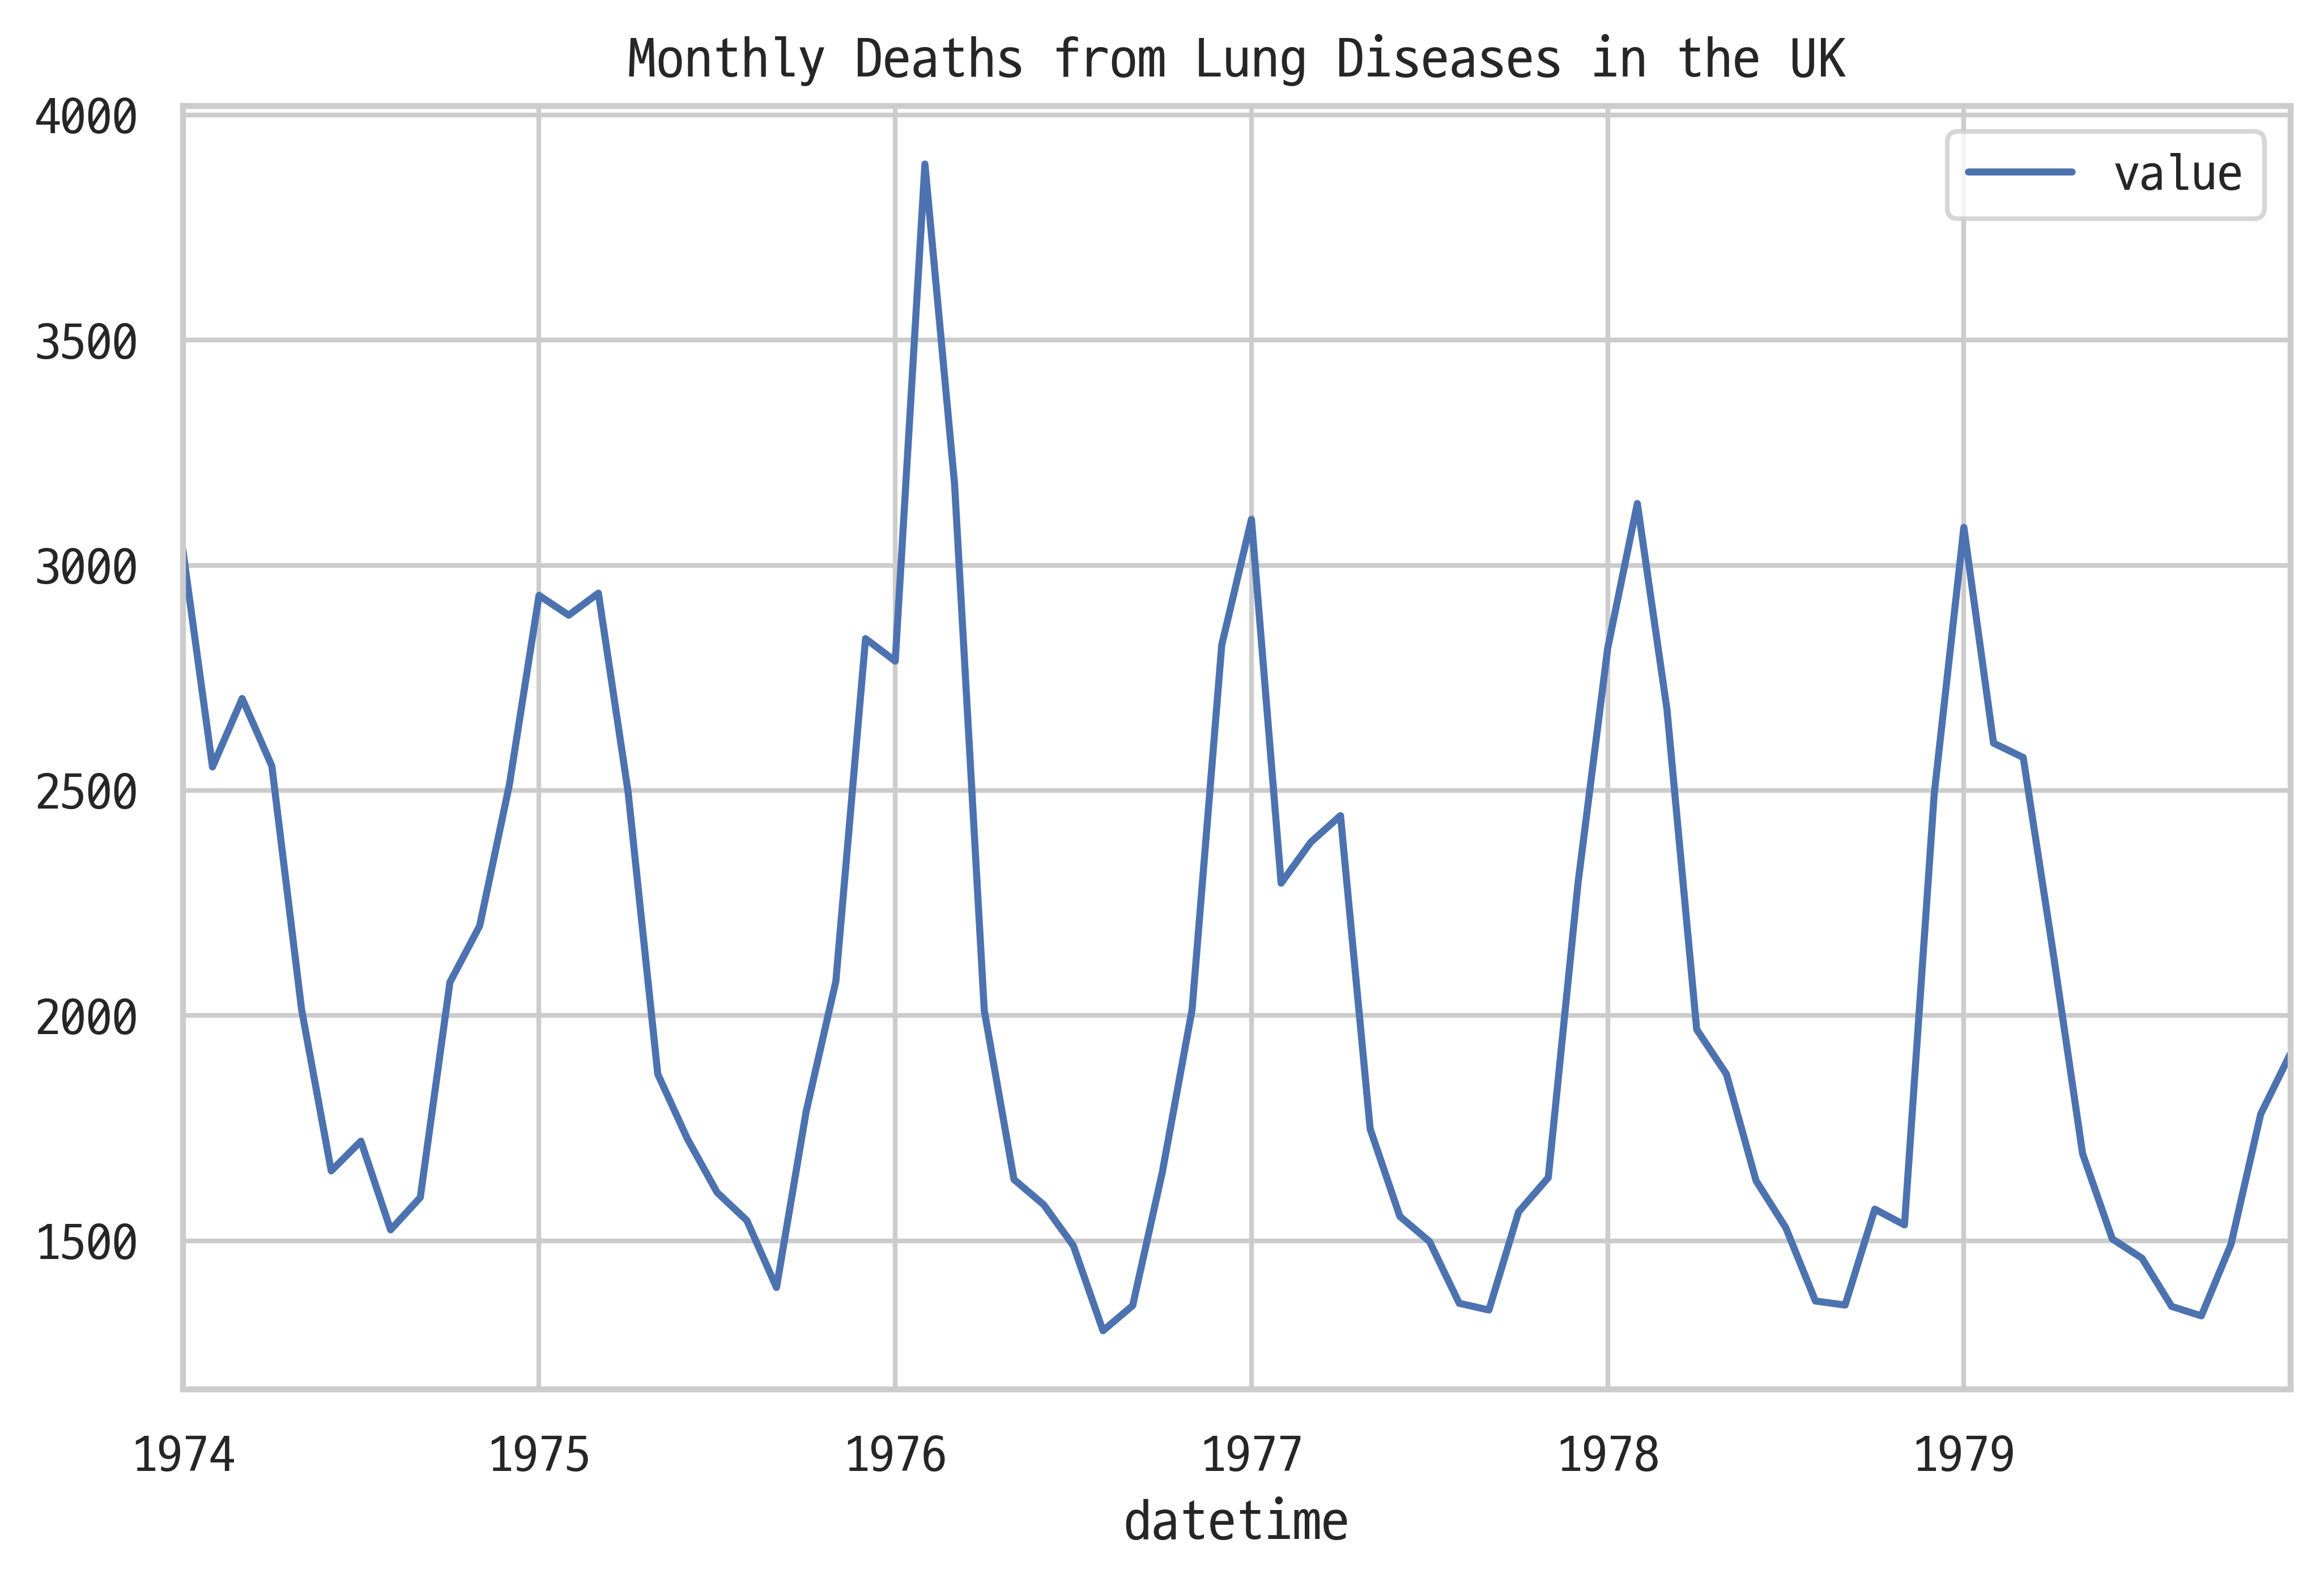

In [8]:
df.plot(x='datetime', y='value')
plt.title(data.title)
plt.show()

#### scikit-learn에서 제공하는 데이터

In [9]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


#### 가상 데이터

w:
 15.896958364551972


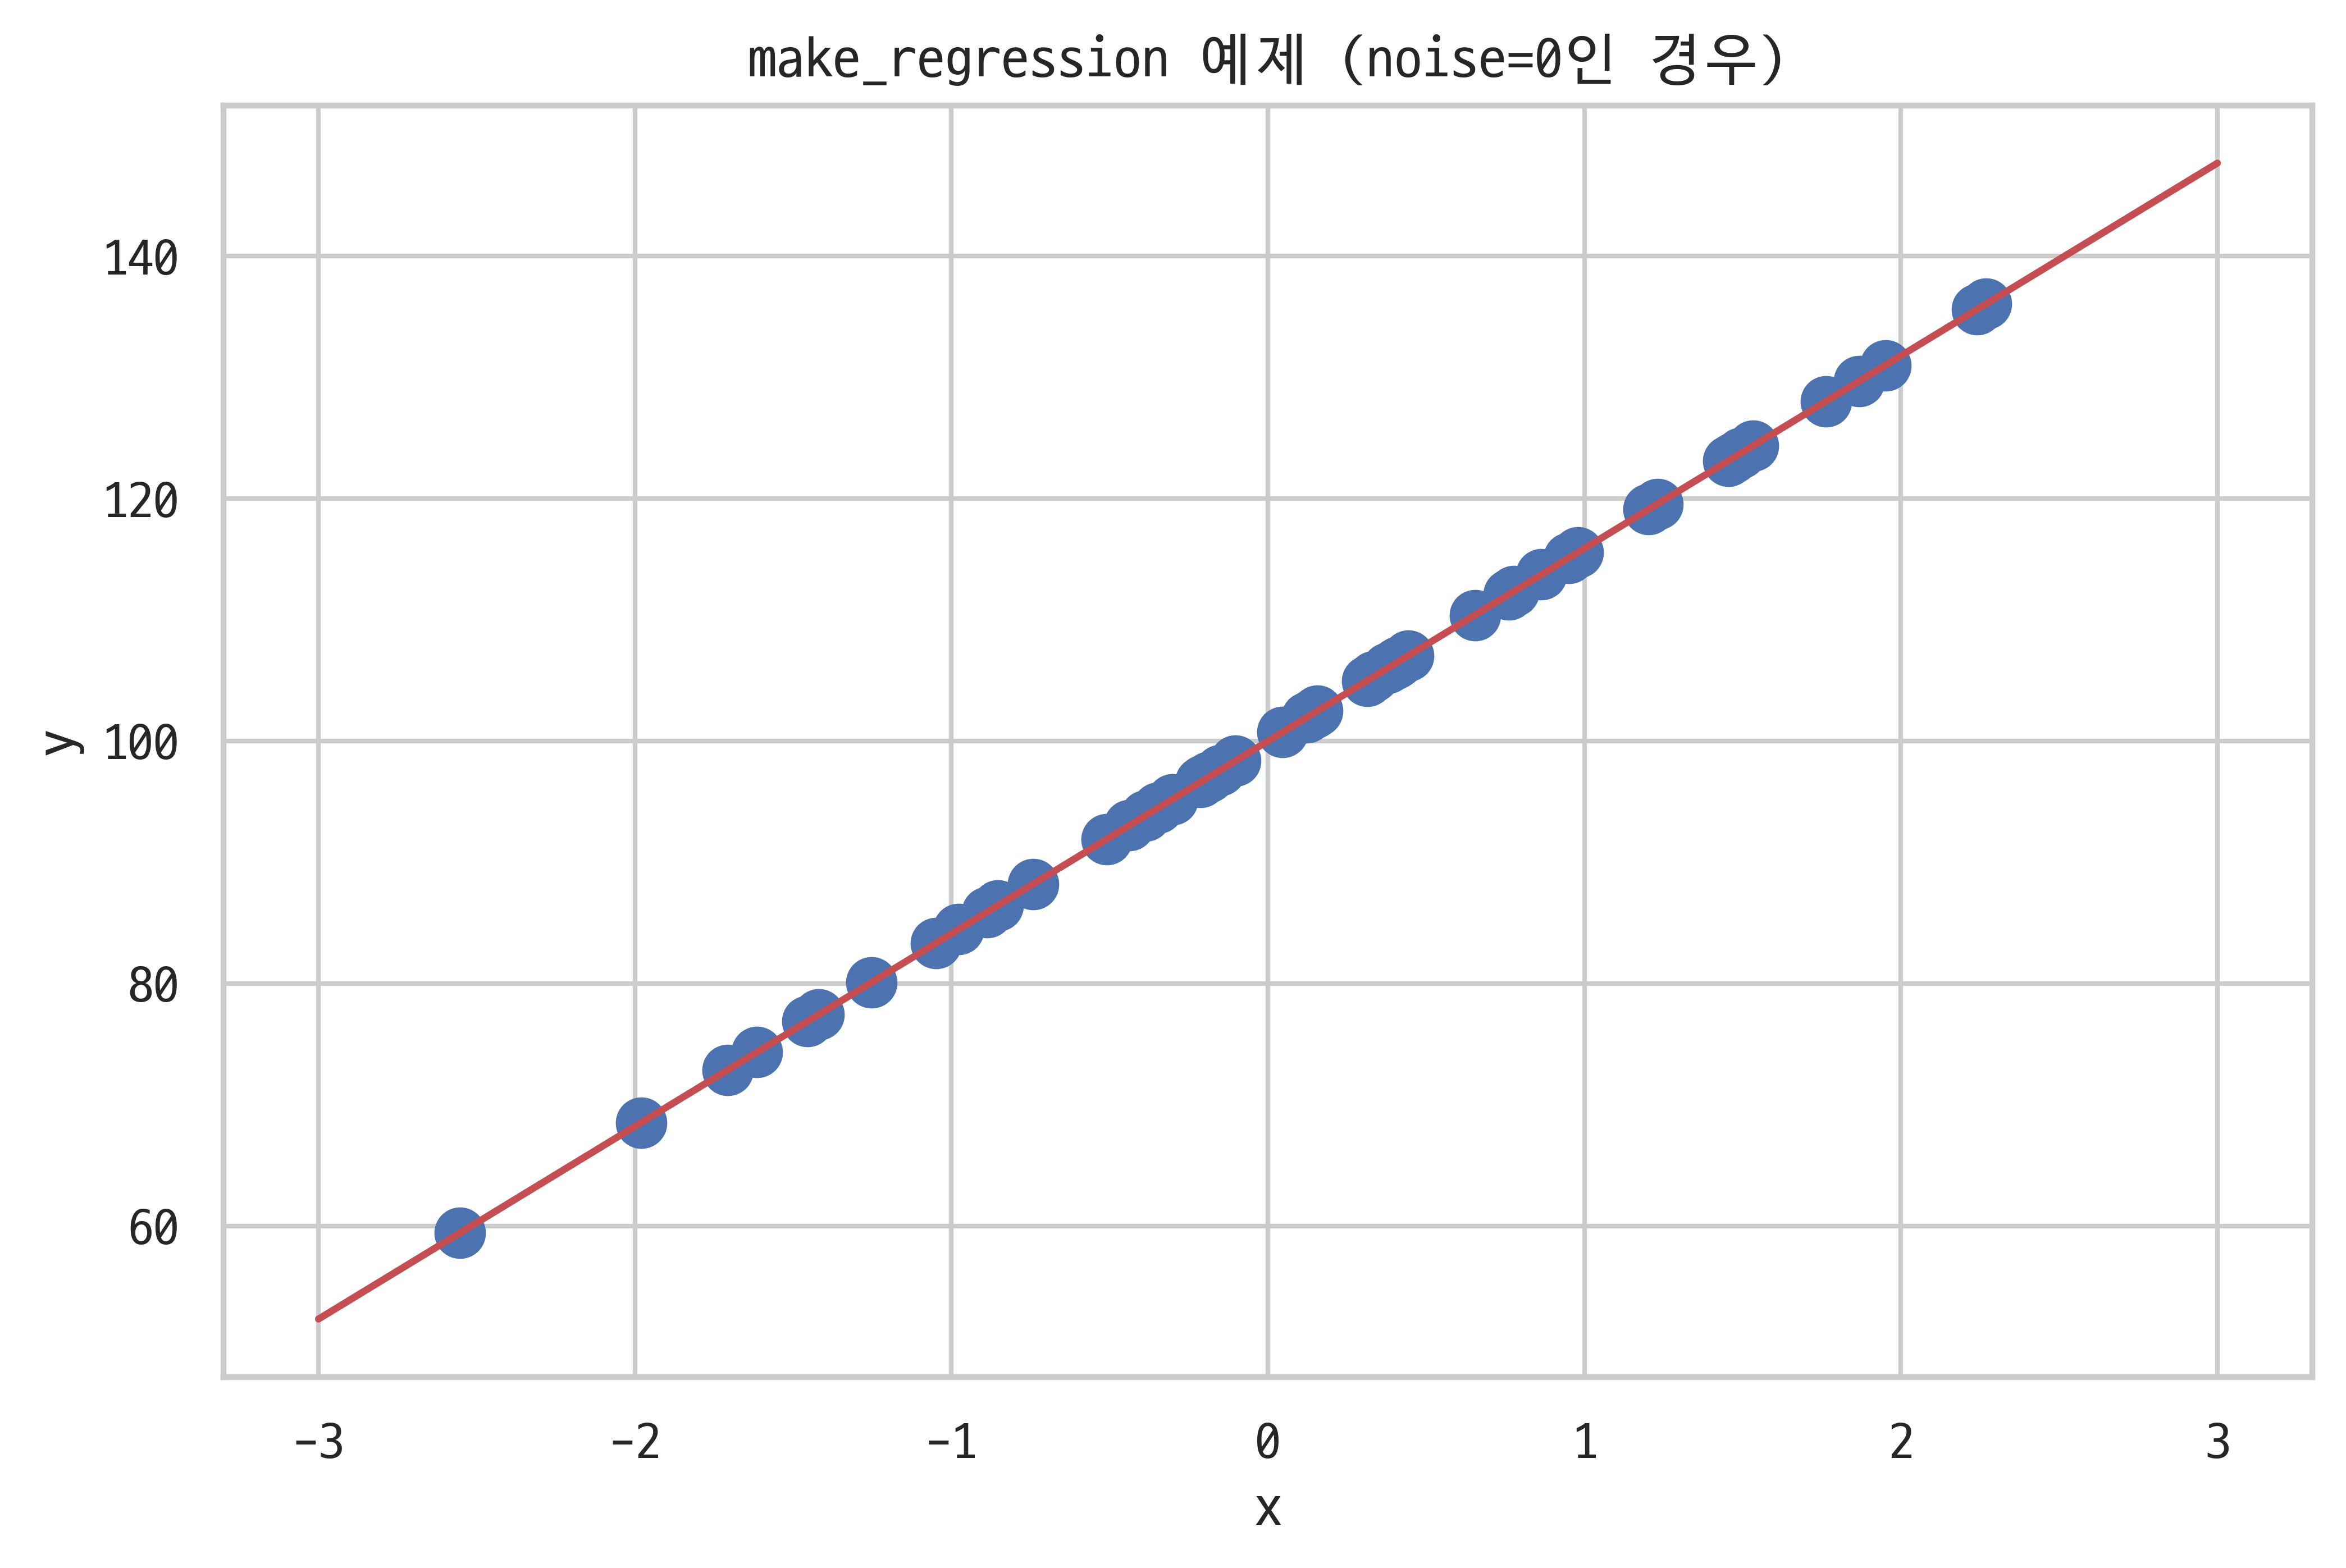

In [11]:
from sklearn.datasets import make_regression

X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=0, coef=True, random_state=0)
print("w:\n", w)

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, 'r-')
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제 (noise=0인 경우)")
plt.show()

w:
 15.896958364551972


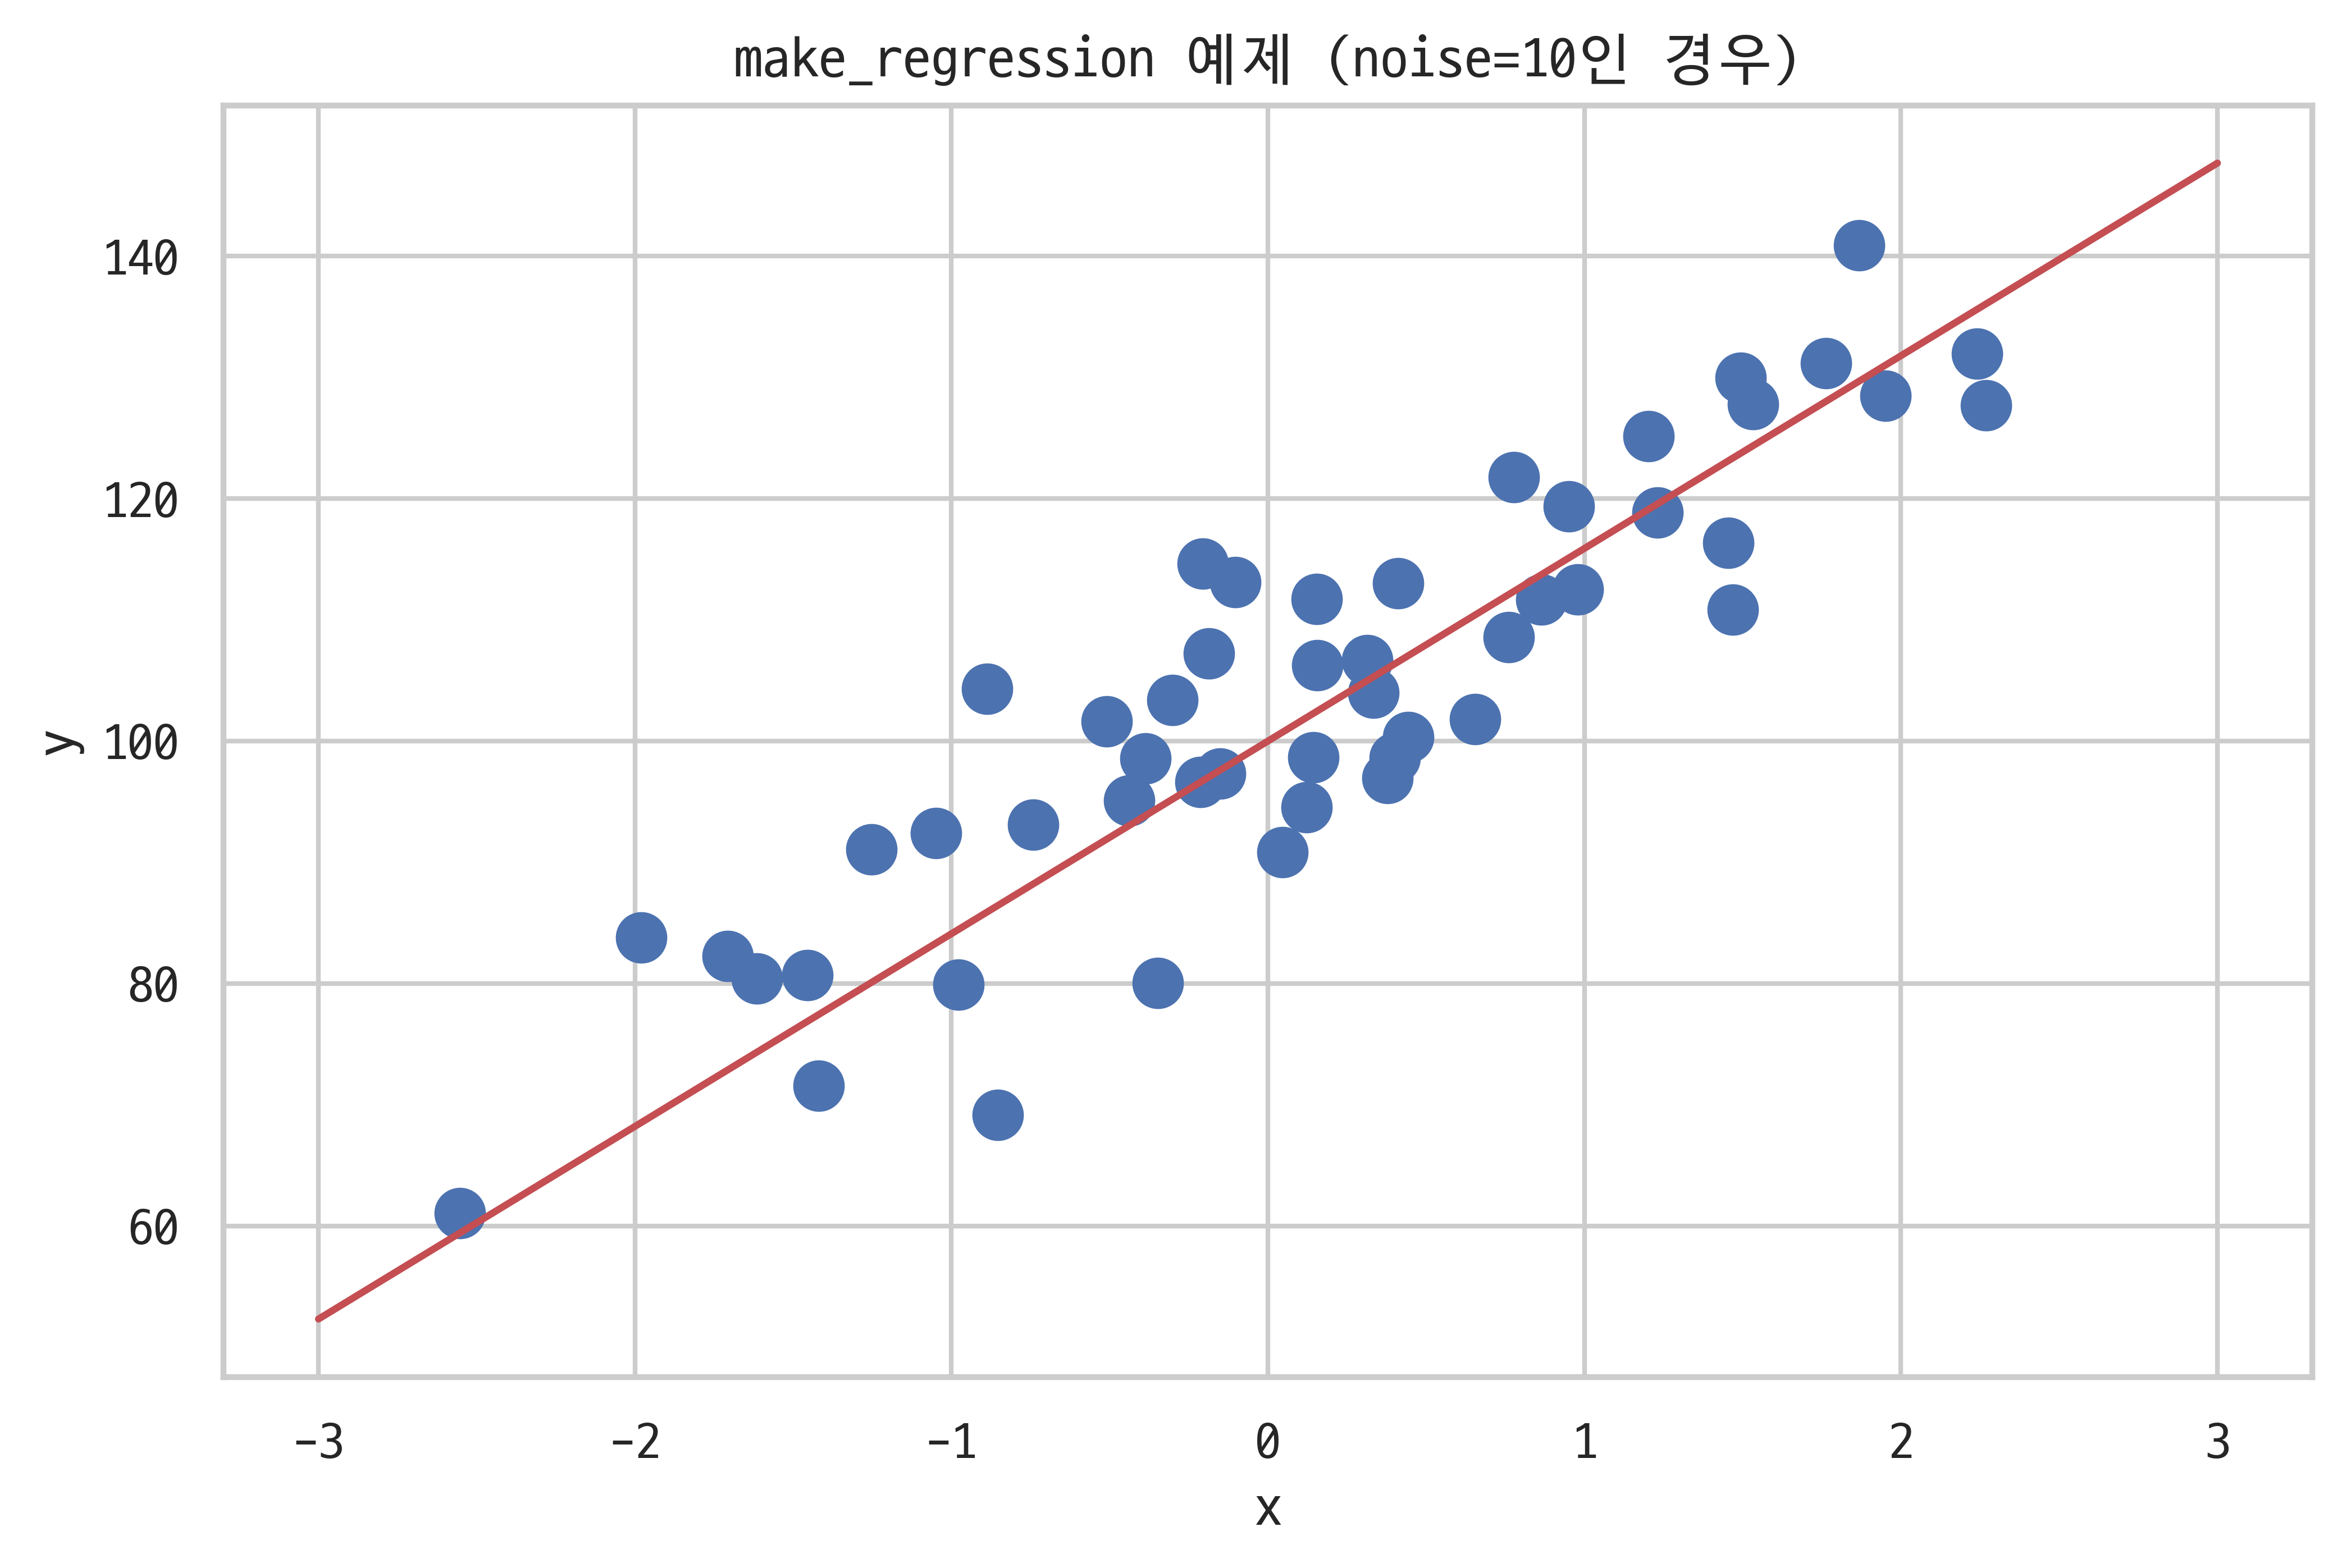

In [12]:
X, y, w = make_regression(n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0)
print("w:\n", w)

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, 'r-')
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제 (noise=10인 경우)")
plt.show()

#### Ex. 1.2.1

In [13]:
def make_regression2(n_samples=100, bias=0, noise=0, random_state=0):
    X, y, w = make_regression(n_samples=100, n_features=1, bias=0, noise=0, coef=True, random_state=0)
    return X, y, w

In [14]:
def make_regression3(n_samples=100, coef=True, bias=0, noise=0, random_state=0):
    X, y, w = make_regression2(n_samples=100, bias=0, noise=0, random_state=0)
    return X, y, w

##### 예제 6

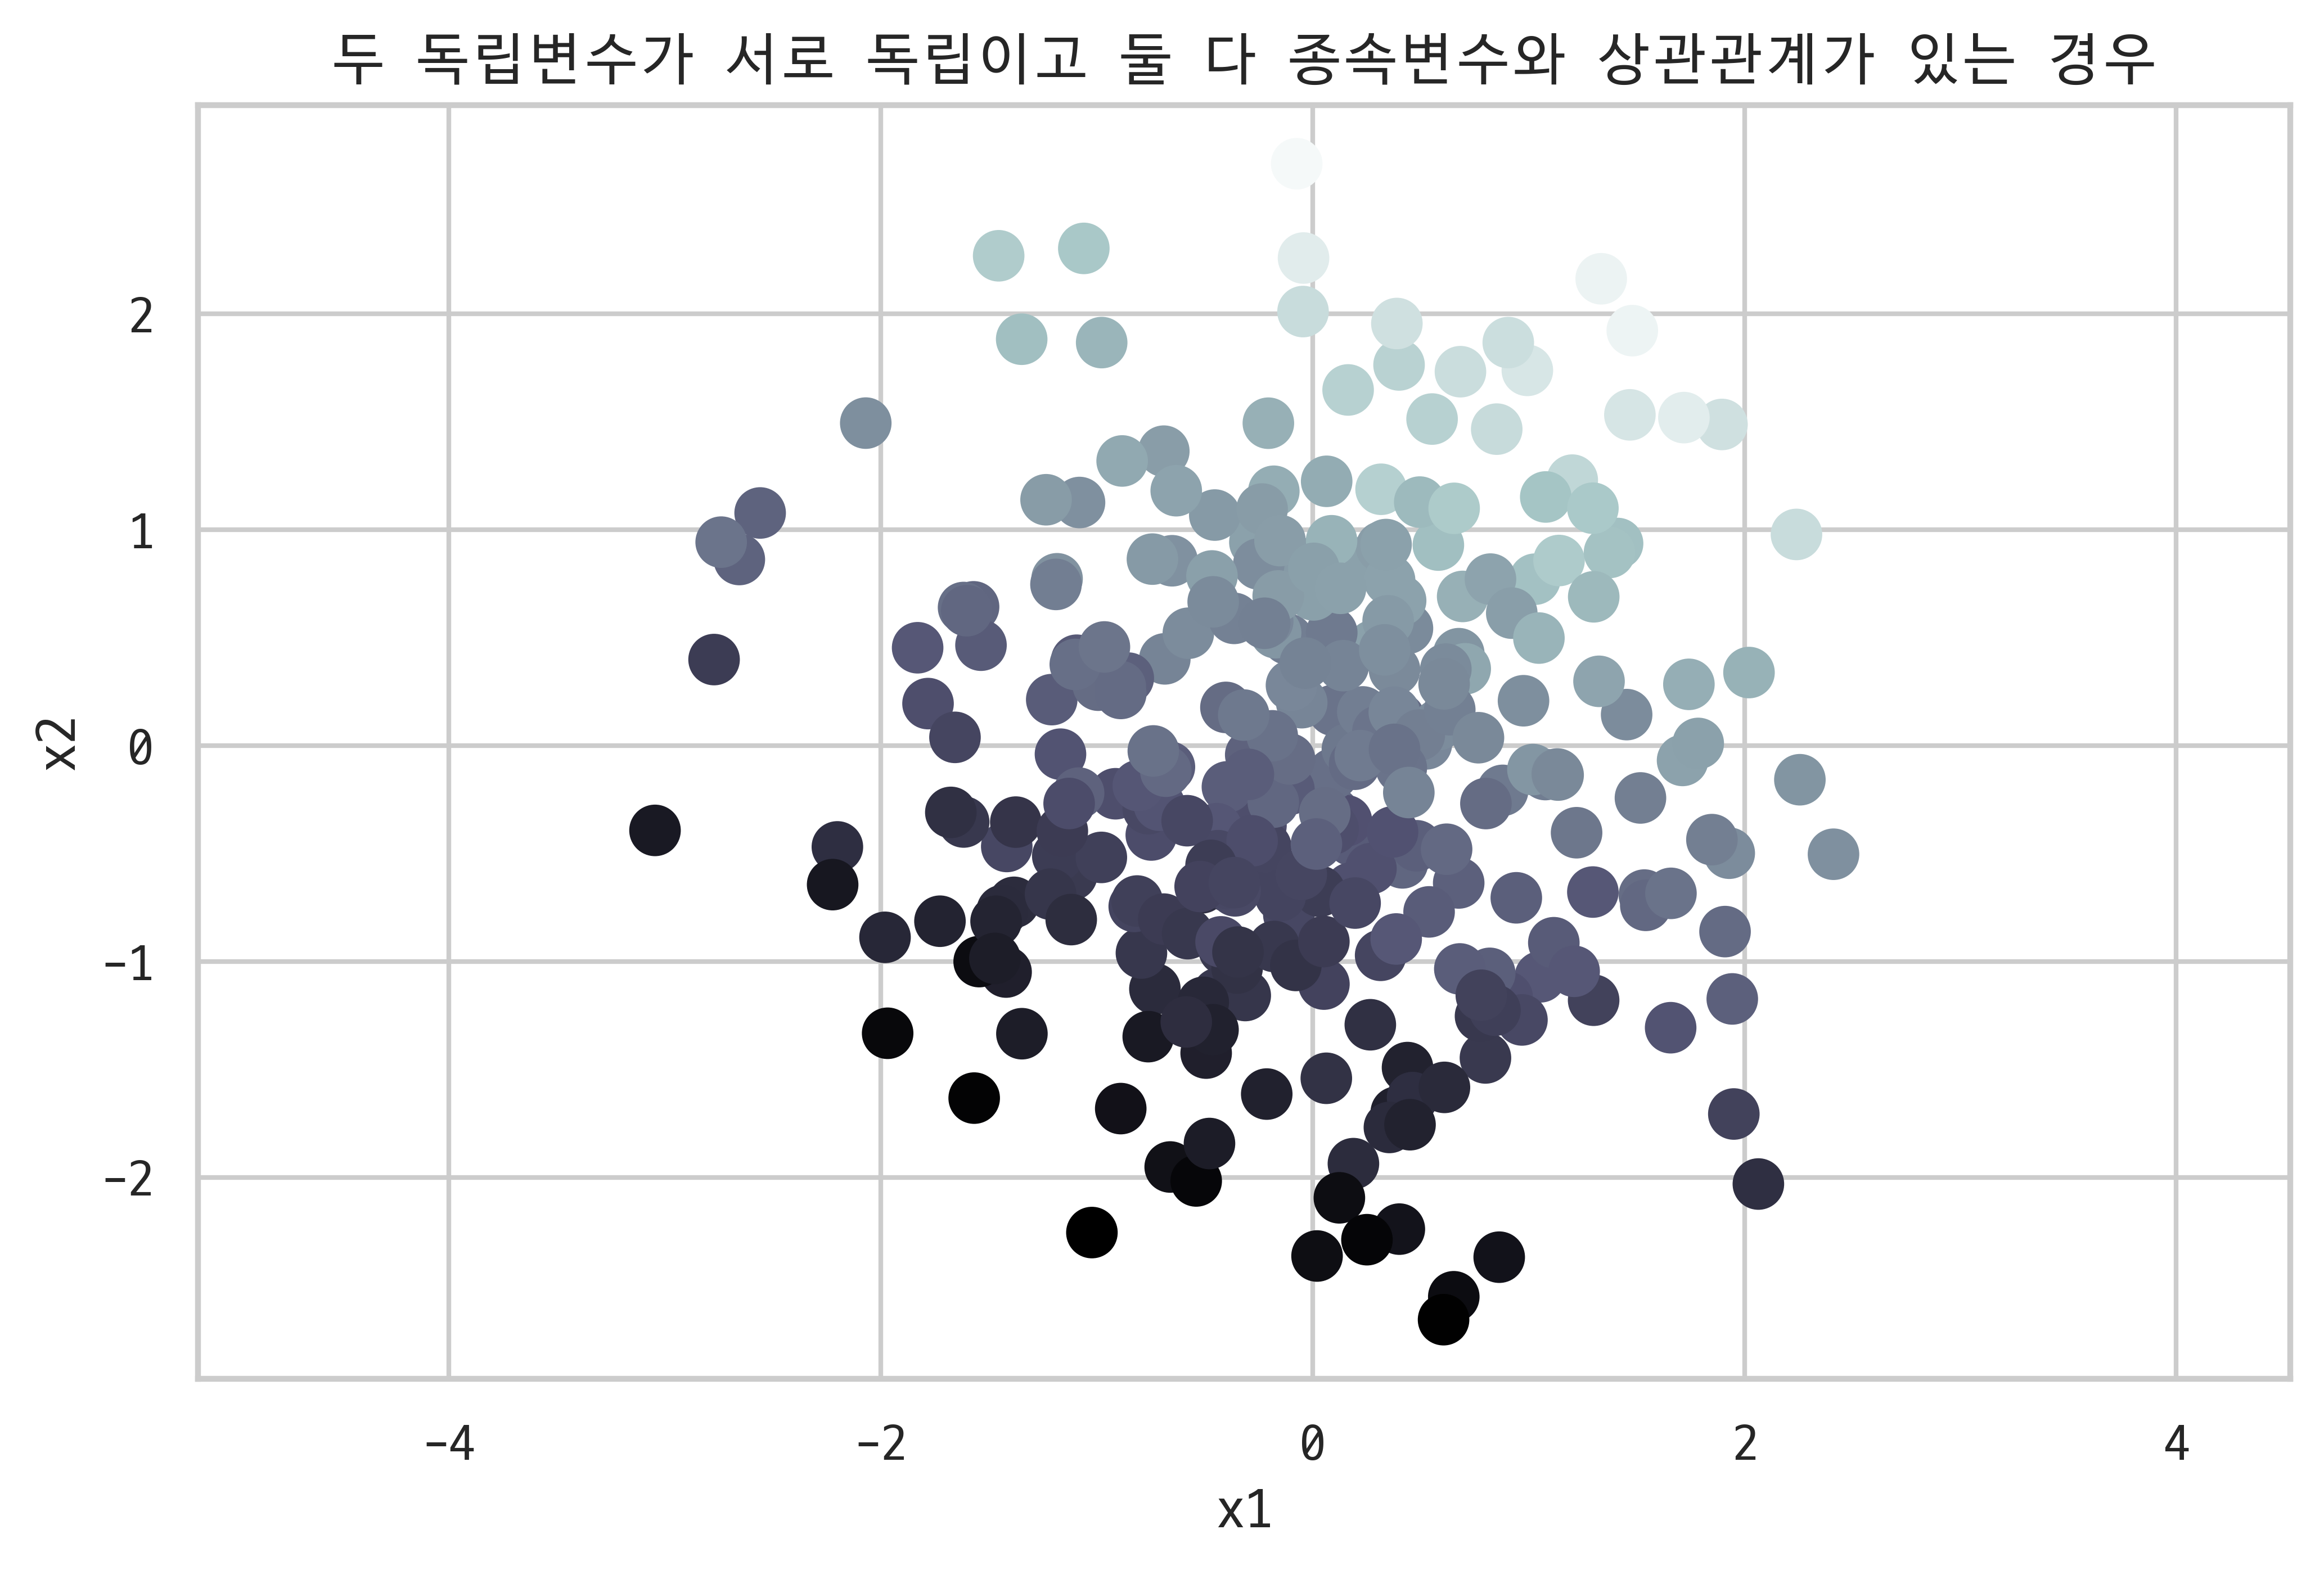

In [16]:
X, y, w = make_regression(n_samples=300, n_features=2, noise=10, coef=True, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 다 종속변수와 상관관계가 있는 경우")
plt.show()

##### 예제 7

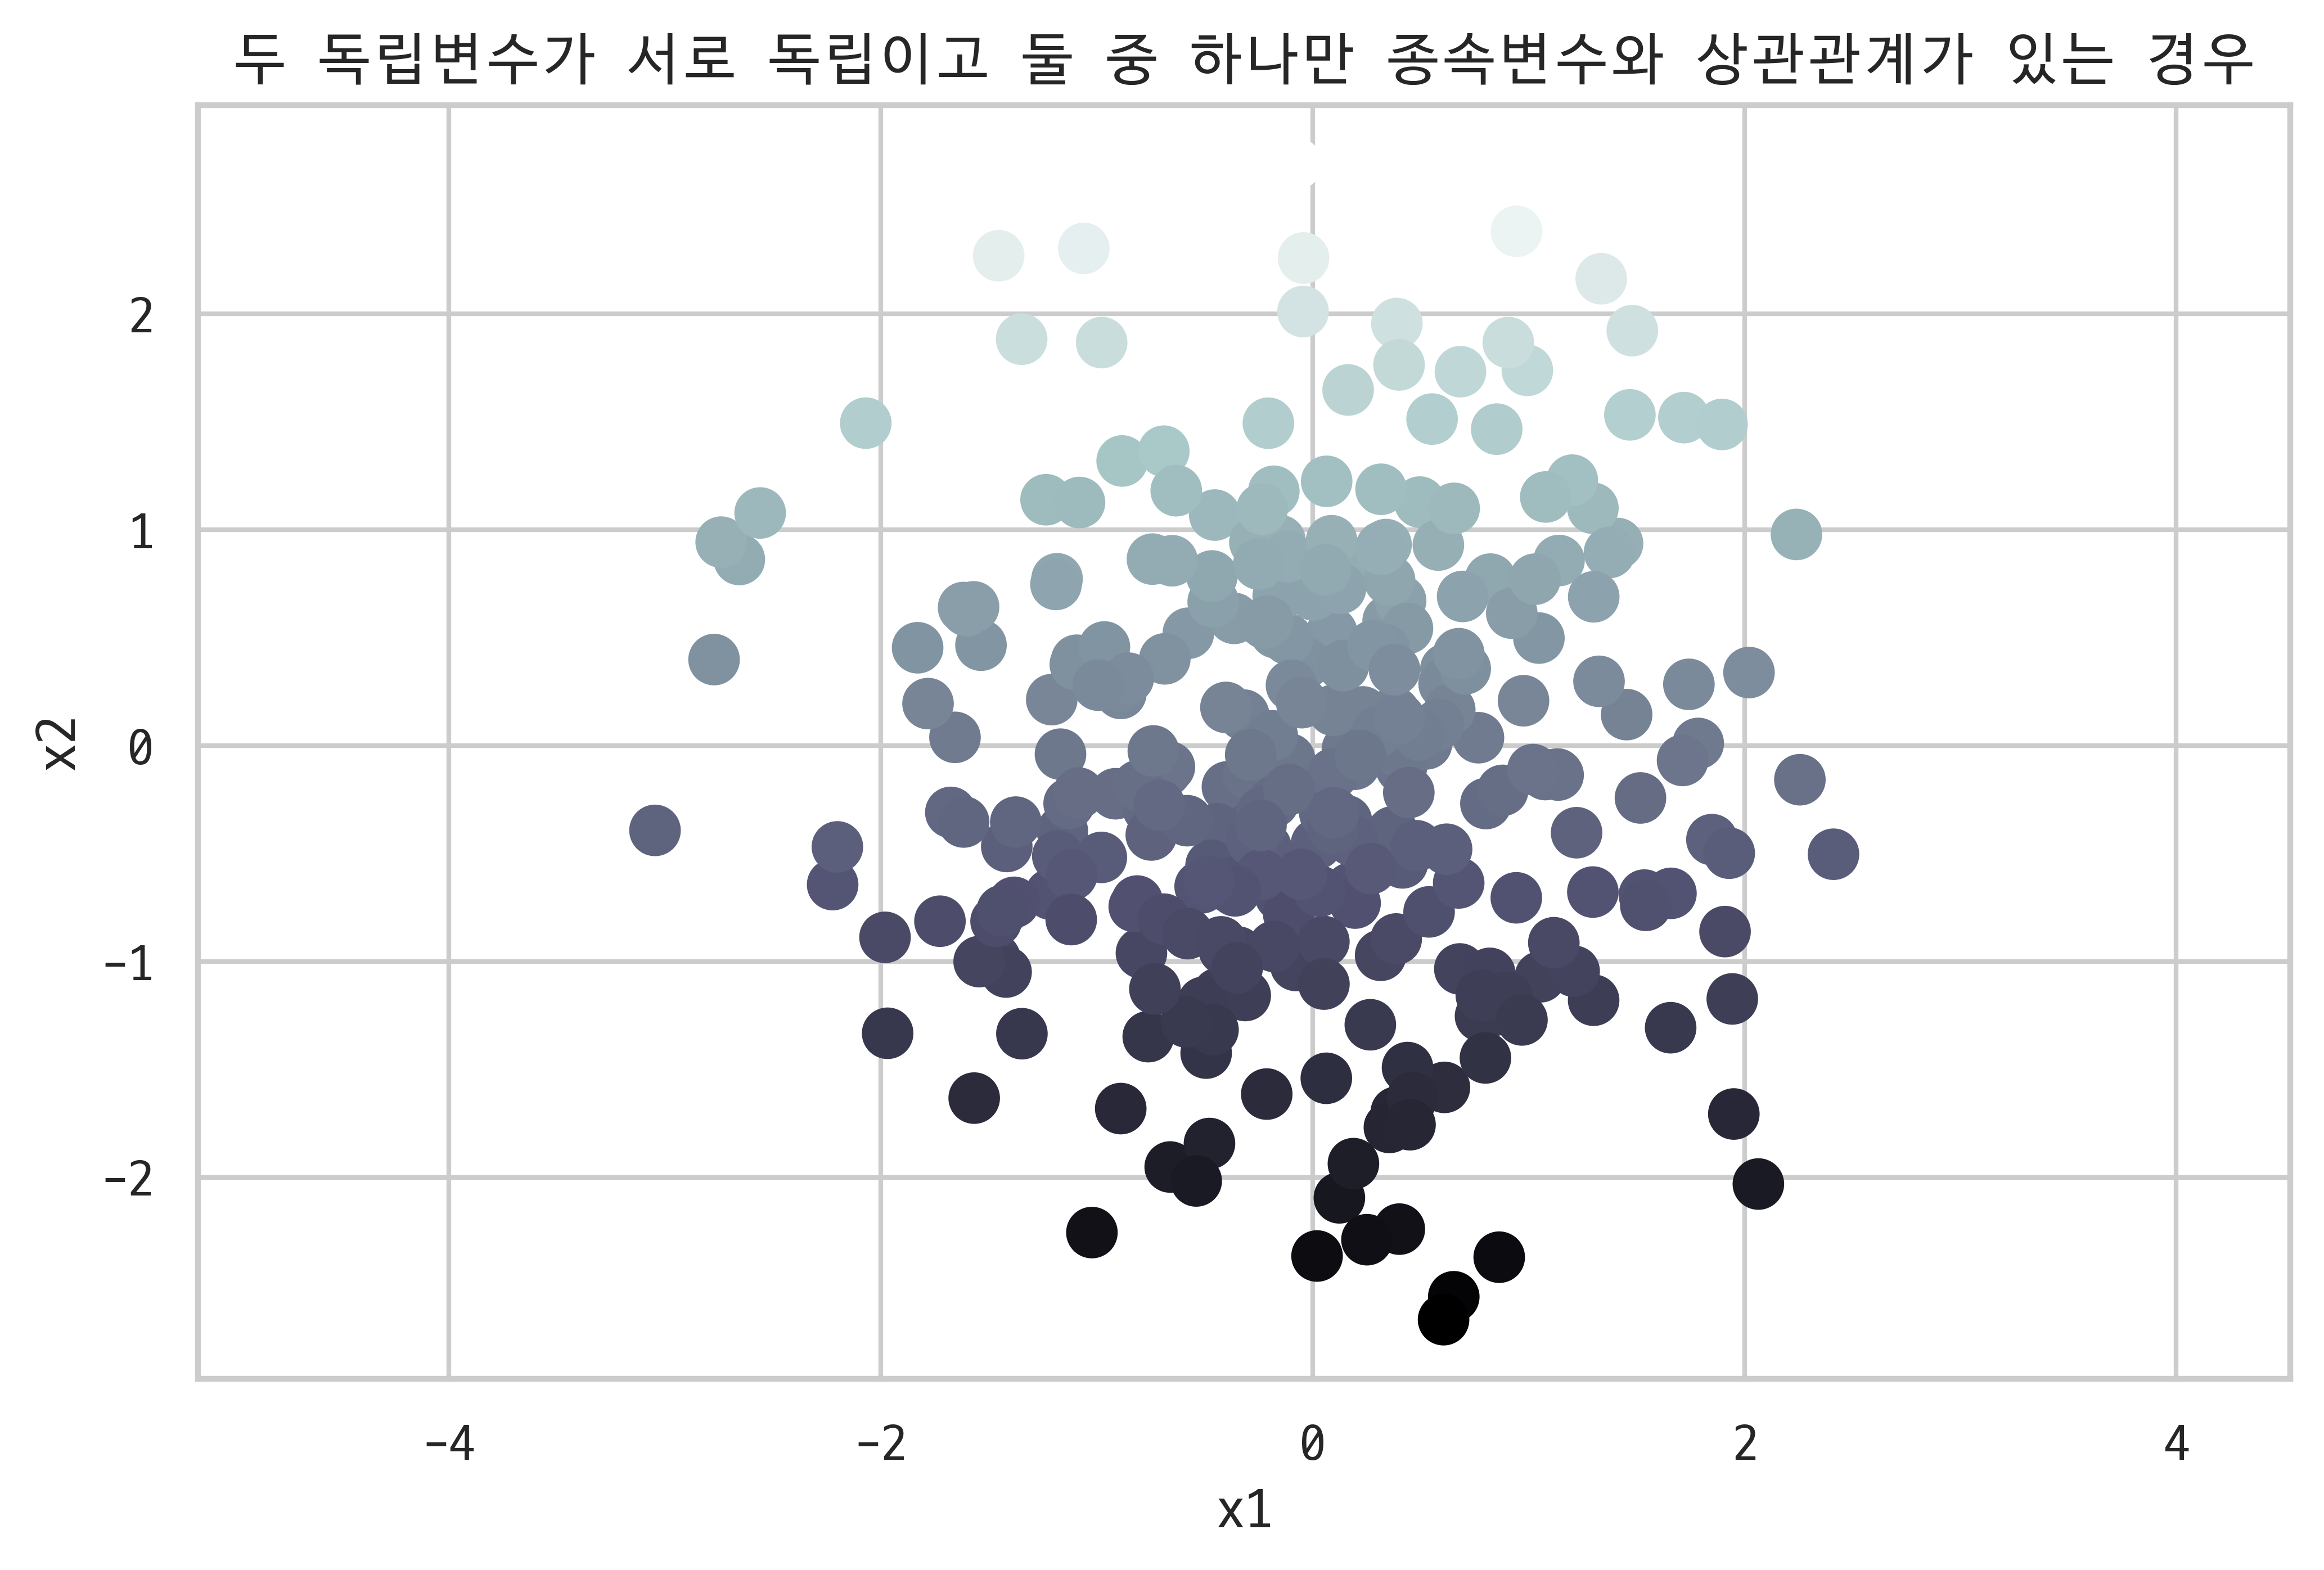

In [17]:
X, y, w = make_regression(n_samples=300, n_features=2, n_informative=1, noise=0, coef=True, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 중 하나만 종속변수와 상관관계가 있는 경우")
plt.show()

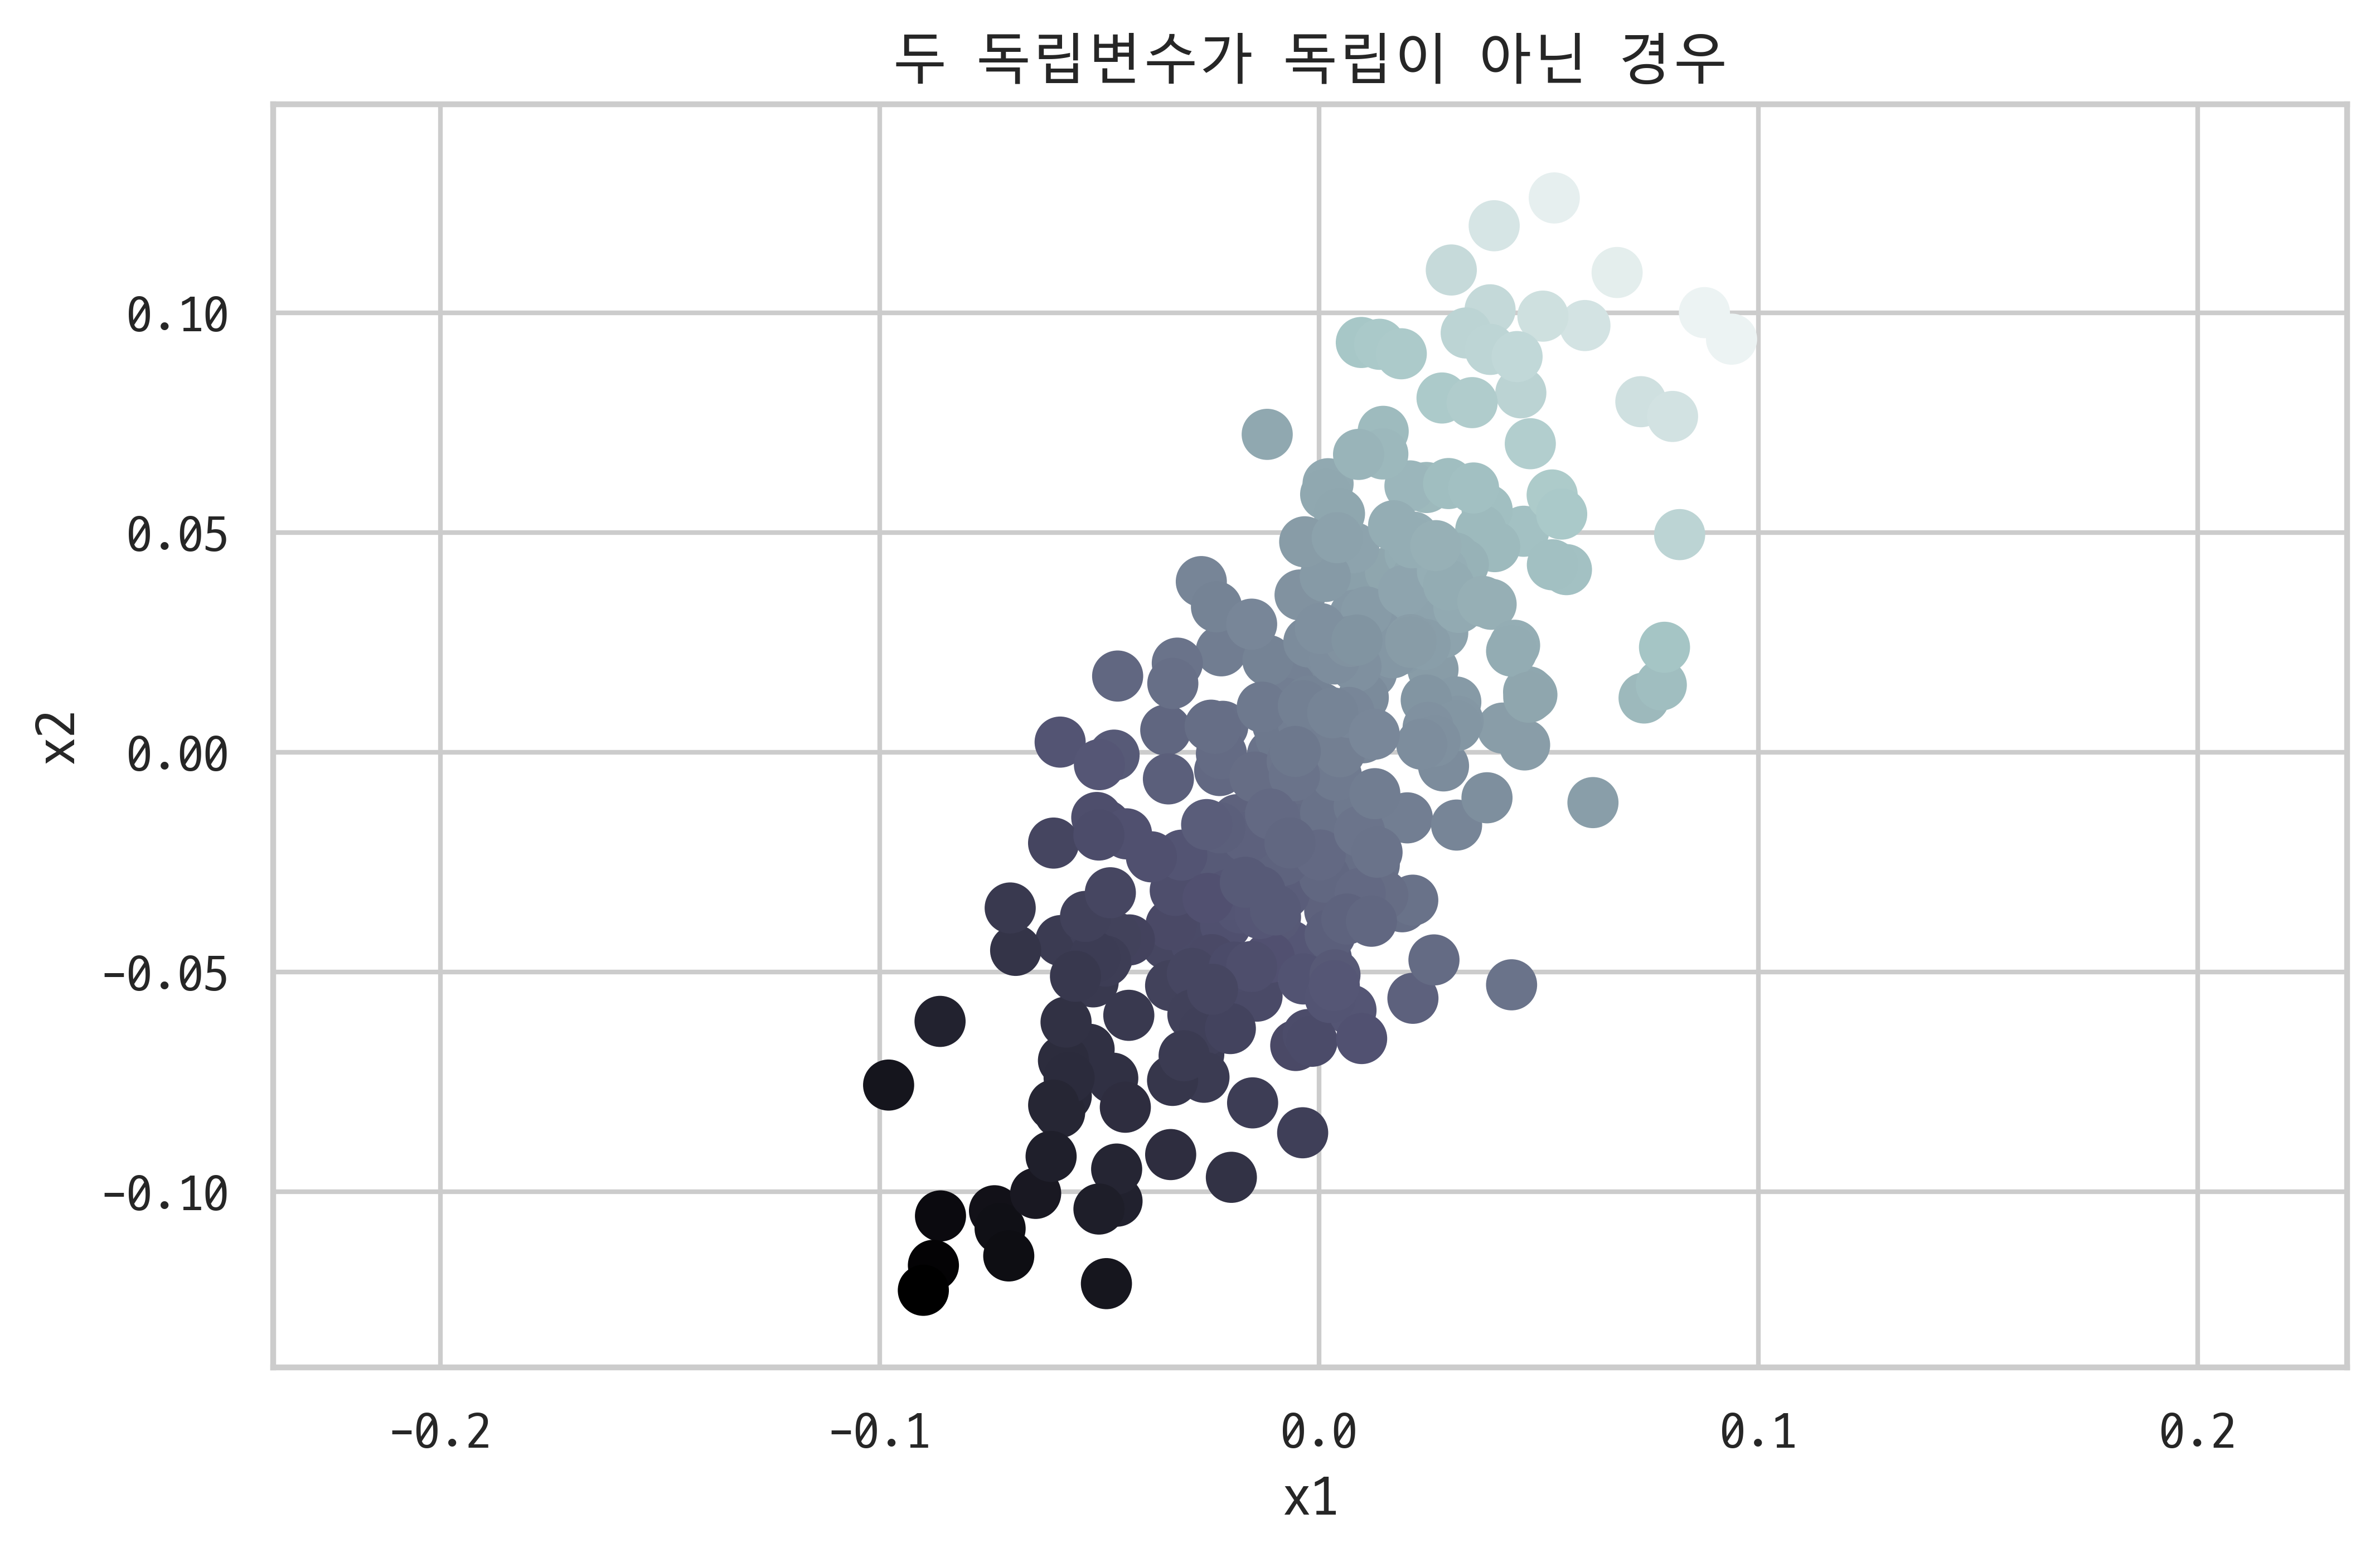

In [19]:
X, y, w = make_regression(n_samples=300, n_features=2, effective_rank=1, noise=0, coef=True, random_state=0, tail_strength=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 독립이 아닌 경우")
plt.show()